# This model is created for predicting Heart Disease
tools used-pandas,matplotlib,numpy,scikit-learn
##### Author - Saumik

Steps involved 
1) Problem Definition
2) Data 
3) Evaluation
4) Features
5) Modelling(Classification)
6) Experiment or tuning

### 1) Problem Definition 
From the given data we will predict whether or not a given patient has heart disease

### 2) Data
data from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

### 3)Evaluation
This model is almost 84% accurate in finding whether patient has heart disease or not 
I have experimented with lots of models but the tuned logistic regression model gave the best cross val score

### 4) Features
* 1) age - age in years
* 2) sex - (1 = male; 0 = female)
* 3) cp - chest pain type
     - 0: Typical angina: chest pain related decrease blood supply to the heart
     - 1: Atypical angina: chest pain not related to heart
     - 2: Non-anginal pain: typically esophageal spasms (non heart related)
     - 3: Asymptomatic: chest pain not showing signs of disease
     - 4) trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* 5) chol - serum cholestoral in mg/dl
     serum = LDL + HDL + .2 * triglycerides
     above 200 is cause for concern
* 6) fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* 7) restecg - resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
* 8) thalach - maximum heart rate achieved
* 9) exang - exercise induced angina (1 = yes; 0 = no)
* 10) oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will * * stress more
* 11) slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
* 12) ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* 13) thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
* 14) target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
## importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
## for evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
details=pd.read_csv("heart-disease (1).csv")
details.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

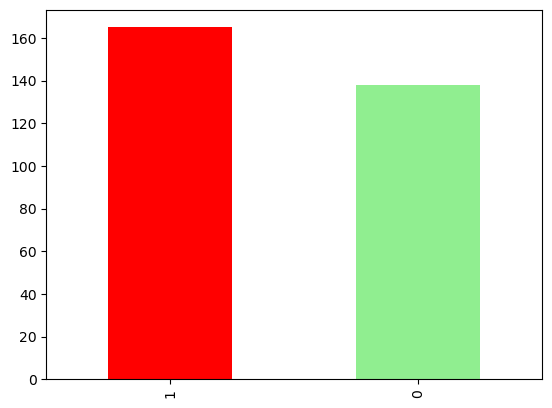

In [3]:
## now its very important to analyse the data and check how many no of patients have or not heart disease 
details["target"].value_counts().plot(kind="bar",color=["red","lightgreen"])

In [4]:
##Checking if there is missing data and filling if present
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
##pattern finding 
pd.crosstab(details["target"],details["sex"])

sex,0,1
target,,
0,24,114
1,72,93


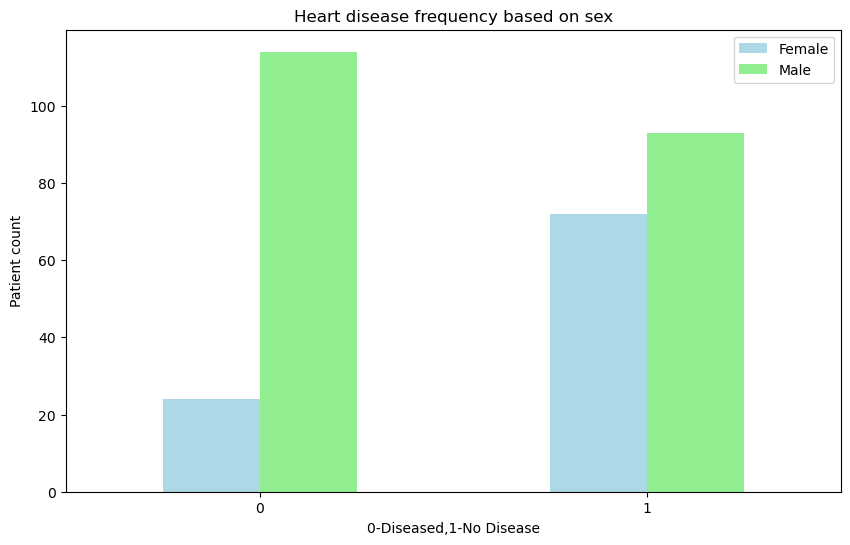

In [6]:
##plotting it for more clearer understanding
pd.crosstab(details["target"],details["sex"]).plot(kind="bar",figsize=(10,6),color=["lightblue","lightgreen"]);
plt.title("Heart disease frequency based on sex");
plt.xlabel("0-Diseased,1-No Disease");
plt.ylabel("Patient count");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

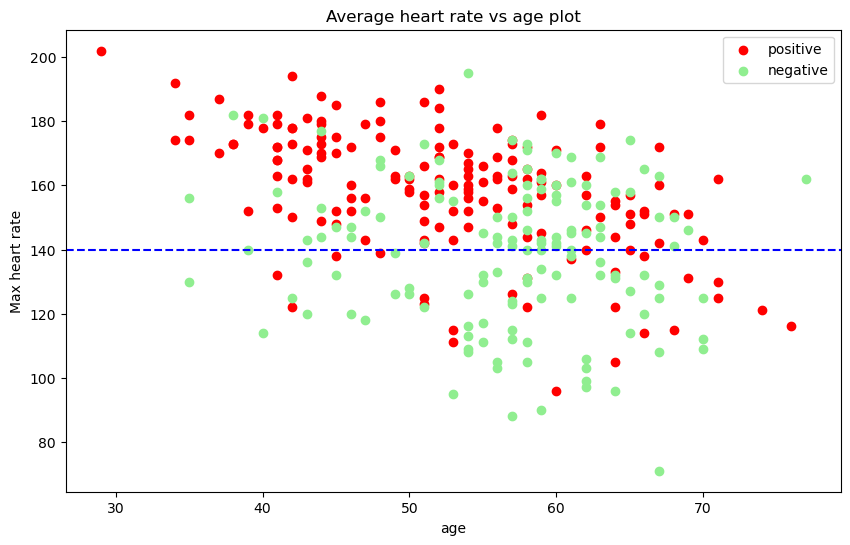

In [7]:
plt.figure(figsize=(10,6))
##scattering value with positive heart diesase
plt.scatter(details.age[details.target==1],
           details.thalach[details.target==1],color="red");
##scattering value with negative heart diesase
plt.scatter(details.age[details.target==0],
           details.thalach[details.target==0],color="lightgreen");
plt.title("Average heart rate vs age plot");
plt.xlabel("age");
plt.ylabel("Max heart rate");
plt.legend(["positive","negative"])
plt.axhline(y=140,color="blue",linestyle="--")

## Heart Disease Frequency per Chest Pain Type
cp - chest pain type
* 0:Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

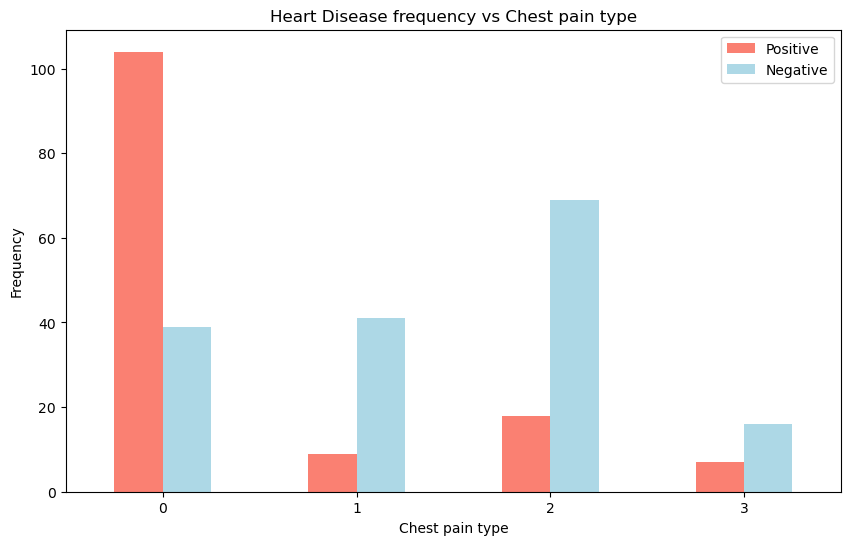

In [8]:
pd.crosstab(details["cp"],details["target"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.xticks(rotation=0);
plt.title("Heart Disease frequency vs Chest pain type");
plt.xlabel("Chest pain type");
plt.ylabel("Frequency");
plt.legend(["Positive","Negative"]);

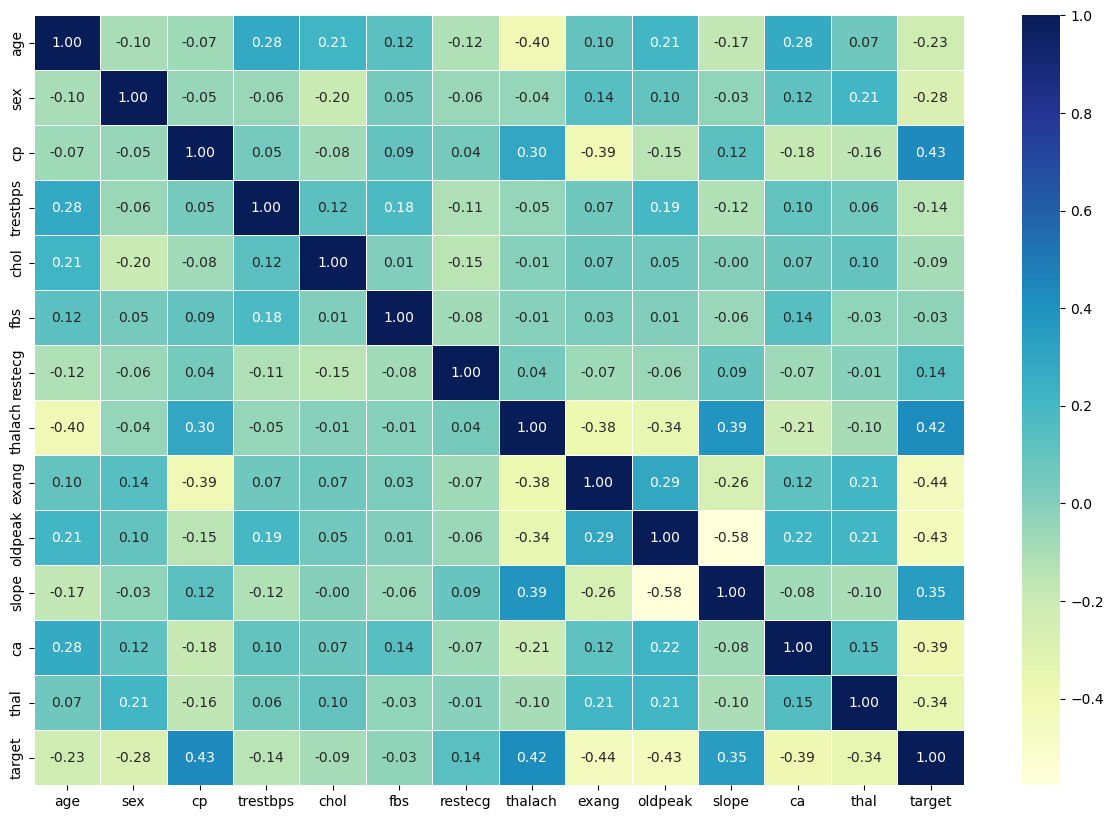

In [9]:
##correlation data matrix
matrix=details.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## Modelling

In [10]:
details.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
## Splitting data as usual into training and test set
X=details.drop("target",axis=1)
y=details["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
py.random.seed(42)
##Split into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [13]:
X_train.shape

(242, 13)

In [14]:
len(y_train)

242

In [15]:
models={"Logistic Regression" : LogisticRegression(),
       "KNN" : KNeighborsClassifier(),
       "Random Forest" : RandomForestClassifier()}
## checking scores for each model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    py.random.seed(42)
    model_scores={}
    for name, model in models.items():
        ##fitting every model and finding score
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test);
    return model_scores
    

In [16]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\saumi\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Experimentation and tuning
* Hyperparmeter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


In [17]:
##tuning 
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [18]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max score for KNN: 75.41%


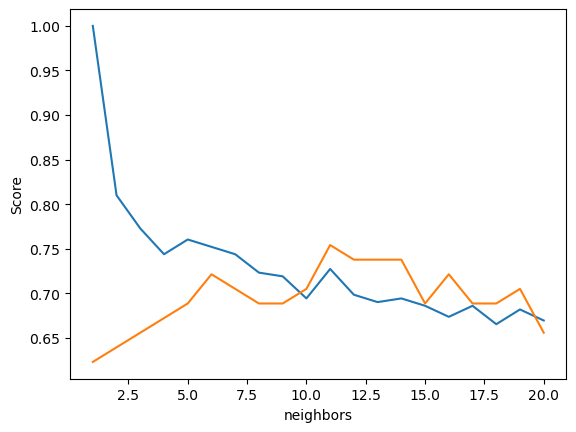

In [19]:
plt.plot(neighbors,train_scores,label="train score");
plt.plot(neighbors,test_scores,label="test score");
plt.xlabel("neighbors")
plt.ylabel("Score")
plt.legend
print(f"Max score for KNN: {max(test_scores)*100:.2f}%");

### Tune with randomizedsearchCV

In [20]:
##tuning the logistic regression model
log_reg_grid={"C":py.logspace(-4,4,20),
             "solver":["liblinear"]}
random_forest_grid={"n_estimators":py.arange(10,1000,50),
                   "max_depth":[None,4,5,10],
                   "min_samples_split":py.arange(2,20,2),
                   "min_samples_leaf":py.arange(1,20,2)}

In [21]:
py. random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

##### logistic regression gives the same score as randomized search cv
##### so im going to search try with random forest classifier

In [24]:
py. random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=random_forest_grid,
                             cv=5,
                             n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 4, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 4}

In [26]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [27]:
log_reg_grid={"C":py.logspace(-4,4,30),
             "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluation 
* ROC and AUC curve
* COnfusion matrix 
* Classification report

In [30]:
## checking how our model acutally predicts on the test data and check accuracy
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

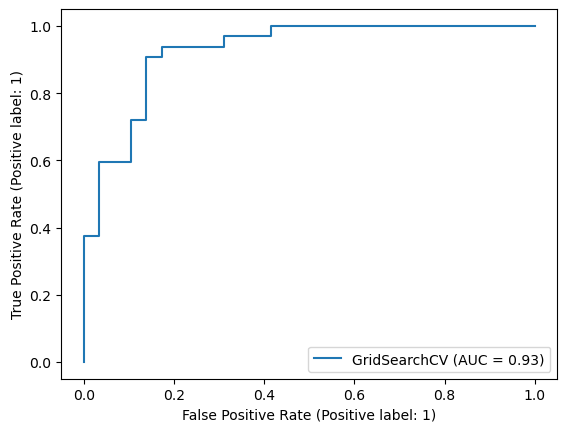

In [32]:
from sklearn.metrics import RocCurveDisplay
curve_disp=RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [33]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


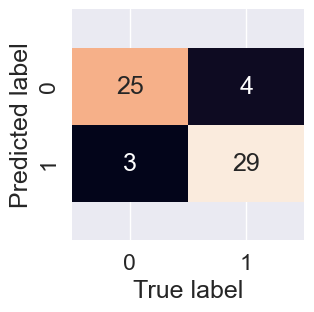

In [34]:
##this confusion matrix will show the true postive rate vs false positive rate 
sns.set(font_scale=1.5)

def plot_confusion_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_confusion_mat(y_test, y_preds)

In [35]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
## to find cross val score with best params
clf=LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
cv_accuracy=cross_val_score(clf,X,y,cv=5)
cv_accuracy

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [38]:
cv_accuracy=py.mean(cv_accuracy)
cv_accuracy


0.8446994535519124

In [39]:
##for cross validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=py.mean(cv_precision)
cv_precision

0.8207936507936507

In [40]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = py.mean(cv_recall)
cv_recall

0.9212121212121213

In [41]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = py.mean(cv_f1)
cv_f1

0.8673007976269721

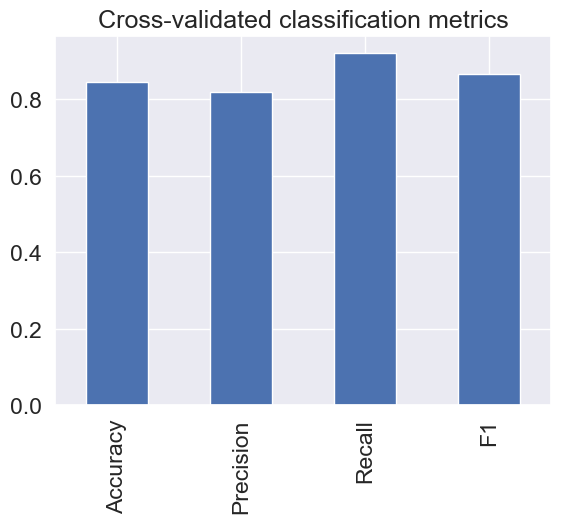

In [42]:
## plotting it more visually
crossvalidation_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

crossvalidation_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Checking which feature plays how much role in predicting target

In [43]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [45]:
##checking coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [46]:
details.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


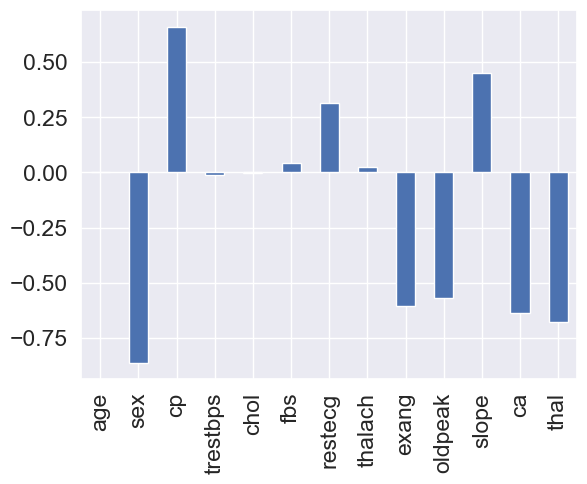

In [47]:
##how much each feature is important
feature_dictionary=dict(zip(details.columns,list(clf.coef_[0])))
feature_dict_plot=pd.DataFrame(feature_dictionary,index=[0])
feature_dict_plot.T.plot(kind="bar",legend=False);

In [48]:
##finally saved the model woof
import pickle

In [49]:
pickle.dump(gs_log_reg,open('model.pkl','wb'))